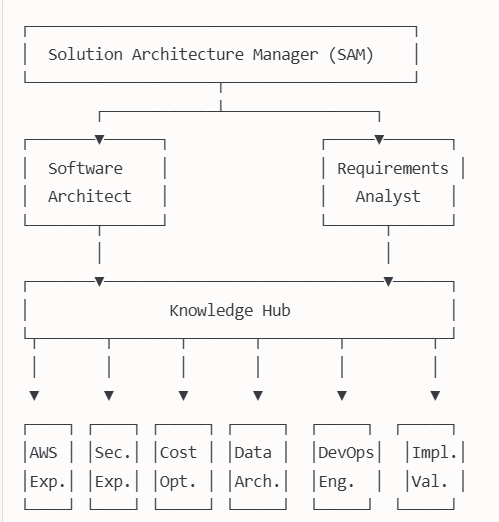

## To Do : 

* Check Crew AI documentation for complex architectures & needs and refine everything

* Remove the internet search from some tools

* How to attach the custom tools to the tasks & agents




* @tool("Architecture Diagram Generator")
* @tool("AWS Cost Estimator")
* @tool("IaC Template Generator")

## Current Architecture

In [ ]:
from crewai import Agent, Task, Crew, Process
from crewai_tools import BaseTool, SerperDevTool, tool
from dotenv import load_dotenv
import re
import json

# Load environment variables for API keys
load_dotenv()

# Initialize tools
search_tool = SerperDevTool()

# Create custom tools
@tool("Software architecture pattern analyzer")
def analyze_architecture_patterns(query):
    """Analyzes software architecture patterns for specific use cases"""
    return search_tool.search(f"software architecture patterns for {query} pros and cons analysis")

@tool("AWS service recommendation")
def aws_service_recommendation(requirements):
    """Recommends AWS services based on specific requirements"""
    return search_tool.search(f"best AWS services for {requirements} detailed comparison")

@tool("Requirements analyzer")
def analyze_requirements(use_case):
    """
    Analyzes requirements for a specific use case and determines needed specialists.
    This tool doesn't need internet search as it uses the agent's knowledge to assess
    the complexity and requirements of different aspects of the use case.
    """
    # This tool now relies on the agent's internal knowledge rather than search
    return f"Analyzed requirements for {use_case}. Please evaluate technical requirements based on your expertise."

@tool("Team composition analyzer")
def analyze_team_composition(requirements_analysis):
    """
    Determines optimal team composition based on requirements analysis.
    This tool leverages the agent's knowledge to recommend specialists.
    """
    # This tool now relies on the agent's internal knowledge rather than search
    return f"Based on the analysis of {requirements_analysis}, please determine the optimal team composition using your expertise."

# Define the hierarchical manager agent
project_manager = Agent(
    role="Project Manager",
    goal="Orchestrate the creation of a detailed, implementation-ready AWS architecture and manage the specialist team",
    backstory=(
        "You are a seasoned technical project manager with 15+ years of experience leading complex AWS projects. "
        "You excel at coordinating specialist teams, synthesizing diverse inputs, and ensuring "
        "the final deliverable meets all customer requirements while maintaining practical "
        "implementability. You have a track record of delivering solutions on time and within budget."
    ),
    verbose=True,
    allow_delegation=True
)

# Define the requirements assessment agent
requirements_analyst = Agent(
    role="Requirements Analyst & Team Architect",
    goal="Analyze project requirements and determine which specialists are needed for {use_case}",
    backstory=(
        "You are a senior technical business analyst who specializes in translating business "
        "requirements into technical specifications and determining the optimal team composition. "
        "You excel at identifying which specialty areas will be crucial for project success and "
        "can accurately rate their importance on a scale of 1-5. Your comprehensive analyses "
        "help technical teams focus their efforts on the most important aspects of a solution."
    ),
    tools=[analyze_requirements, analyze_team_composition],
    verbose=True,
    allow_delegation=True
)

# Define the specialist agents (will be conditionally included based on requirements analysis)
software_architect = Agent(
    role="Software Architecture Specialist",
    goal="Design the optimal software architecture pattern for {use_case} before cloud implementation",
    backstory=(
        "You are an expert software architect with deep knowledge of architecture patterns (microservices, "
        "monolithic, serverless, event-driven, etc). You understand how to match business requirements to "
        "architectural approaches, considering factors like development velocity, team expertise, "
        "scalability needs, and integration complexity. You specialize in designing systems that can be "
        "effectively implemented on AWS."
    ),
    tools=[analyze_architecture_patterns],
    verbose=True,
    allow_delegation=True
)

aws_expert = Agent(
    role="AWS Solution Specialist",
    goal="Recommend optimal AWS services and configurations for implementing {use_case}",
    backstory=(
        "You are an AWS-certified solutions architect with extensive hands-on experience. "
        "You have deep knowledge of AWS services, their limitations, pricing models, and best practices. "
        "You specialize in selecting the right AWS services that align with both technical requirements "
        "and business constraints, paying particular attention to the specific parameters of {use_case}."
    ),
    tools=[aws_service_recommendation],
    verbose=True,
    allow_delegation=True
)

security_expert = Agent(
    role="Security & Compliance Architect",
    goal="Design secure AWS architectures that meet {security_tier} requirements and {compliance} standards",
    backstory=(
        "You are an AWS security specialist with certifications in security engineering and compliance. "
        "You understand how to implement defense-in-depth strategies across AWS services and have "
        "experience implementing architectures that satisfy regulatory requirements like {compliance}. "
        "You focus on practical security implementations rather than theoretical guidelines."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True
)

cost_specialist = Agent(
    role="Cost Optimization Specialist",
    goal="Optimize the architecture for {cost_profile} while maintaining required performance",
    backstory=(
        "You specialize in AWS cost optimization with experience in FinOps practices. "
        "You understand how to balance performance requirements with cost constraints, "
        "identifying opportunities for reserved instances, spot fleets, graviton processors, "
        "and other cost-saving approaches. You have deep knowledge of AWS pricing models and "
        "can forecast costs for different implementation scenarios."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True
)

data_architect = Agent(
    role="Data Flow Architect",
    goal="Design efficient data flows and storage solutions for {use_case}",
    backstory=(
        "You are a data architect specializing in designing scalable data pipelines and storage solutions. "
        "You understand AWS data services (RDS, DynamoDB, S3, Kinesis, etc.) and when to apply them. "
        "You excel at designing architectures that handle data efficiently while maintaining data integrity, "
        "considering aspects like data volume, velocity, and variety for {use_case}."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True
)

devops_engineer = Agent(
    role="DevOps Specialist",
    goal="Design CI/CD pipelines and operational processes for {use_case} implementation",
    backstory=(
        "You are a DevOps expert with experience implementing Infrastructure as Code and CI/CD pipelines on AWS. "
        "You understand AWS deployment services (CodePipeline, CodeBuild, etc.) and operational tools "
        "(CloudWatch, X-Ray, etc.). You focus on creating automated, repeatable deployment processes "
        "that enable reliable operation of {use_case} solutions."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True
)

integration_specialist = Agent(
    role="Integration Specialist",
    goal="Design integration architecture for {use_case} with {integration_complexity} requirements",
    backstory=(
        "You are an integration specialist with extensive experience connecting different systems and "
        "services. You excel at designing APIs, webhooks, event buses, and other integration patterns "
        "that enable seamless communication between application components and external systems. "
        "You understand how to balance performance, reliability, and complexity to create "
        "integration architectures that match the {integration_complexity} requirements."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True
)

implementation_validator = Agent(
    role="Implementation Validator",
    goal="Critically review the proposed architecture against AWS best practices and specific requirements",
    backstory=(
        "You are an AWS Well-Architected Framework specialist who reviews architectures for alignment with "
        "best practices and specific requirements. You're skilled at identifying gaps, overengineering, "
        "and optimization opportunities in AWS designs. You provide actionable feedback that improves "
        "architectures while remaining practical for implementation."
    ),
    tools=[search_tool],
    verbose=True,
    allow_delegation=True
)

solution_architect = Agent(
    role="Solution Architecture Integrator",
    goal="Synthesize all specialist inputs into a cohesive, implementation-ready architecture document",
    backstory=(
        "You are a Principal Solutions Architect with expertise in creating comprehensive AWS implementation guides. "
        "You excel at taking inputs from various specialists and crafting them into a cohesive, detailed document "
        "that serves as a step-by-step implementation guide. Your architecture documents are known for their "
        "clarity, completeness, and practical implementability."
    ),
    verbose=True,
    allow_delegation=True
)

# Task 1: Initial Requirements Analysis and Team Assembly
task_analyze_requirements = Task(
    description=(
        "Analyze the provided use case '{use_case}' using the 'Requirements analyzer' tool and determine which specialist areas are needed using the 'Team composition analyzer' tool.\n"
        "Consider the following aspects and rate their importance on a scale of 1-5:\n"
        "1. software_architecture: How complex is the software architecture needs?\n"
        "2. security: How important are security and compliance ({security_tier}, {compliance})?\n"
        "3. cost_optimization: How critical is cost optimization ({cost_profile})?\n"
        "4. data_complexity: How complex are the data handling requirements?\n"
        "5. devops_complexity: How sophisticated are the deployment and operations needs?\n"
        "6. performance_requirements: How demanding are the performance needs ({performance})?\n"
        "7. availability_requirements: How high are the availability requirements ({availability})?\n"
        "8. integration_complexity: How complex are the integration requirements ({integration_complexity})?\n\n"
        "For each area, provide a score from 1-5 where:\n"
        "1 = Not important/minimal requirements\n"
        "3 = Moderately important/standard requirements\n"
        "5 = Critically important/complex requirements\n\n"
        "Based on this scoring, recommend which specialist roles should be included in the team.\n\n"
        "FORMAT YOUR RESPONSE AS FOLLOWS (include the JSON and surrounding tags):\n"
        "<assessment_scores>\n"
        "{{\n"
        "  \"software_architecture\": X,\n"
        "  \"security\": X,\n"
        "  \"cost_optimization\": X,\n"
        "  \"data_complexity\": X,\n"
        "  \"devops_complexity\": X,\n"
        "  \"performance_requirements\": X,\n"
        "  \"availability_requirements\": X,\n"
        "  \"integration_complexity\": X\n"
        "}}\n"
        "</assessment_scores>\n\n"
        "AFTER the JSON, provide detailed justification for each score based on the use case requirements."
    ),
    expected_output=(
        "A comprehensive requirements analysis with specialist area scores (1-5) in JSON format, "
        "followed by detailed justifications for each score based on the use case requirements."
    ),
    agent=requirements_analyst,
    tools=[analyze_requirements, analyze_team_composition]
)

# Task 2: Project Planning and Team Coordination
task_project_planning = Task(
    description=(
        "Based on the requirements analysis and specialist recommendations, create a detailed project plan for developing "
        "the AWS architecture recommendation for {use_case}.\n\n"
        "The plan should include:\n"
        "1. Team composition - which specialists will be involved based on the requirements analysis\n"
        "2. Work breakdown structure - what tasks each specialist will perform\n"
        "3. Dependencies between specialist tasks\n"
        "4. Integration points where specialist outputs will be combined\n"
        "5. Timeline for the architecture development process\n"
        "6. Key deliverables expected from each specialist\n\n"
        "Also include a coordination plan detailing how you will manage the specialist team to ensure "
        "their outputs align and integrate properly into a cohesive architecture document."
    ),
    expected_output=(
        "A detailed project plan with team composition, work breakdown structure, task dependencies, "
        "integration points, timeline, and key deliverables, plus a coordination strategy."
    ),
    agent=project_manager,
    context=[task_analyze_requirements]

)

# Task 3: Software Architecture Design (Conditional)
task_design_software_architecture = Task(
    description=(
        "Design the optimal software architecture pattern for {use_case} based on the requirements document.\n"
        "Consider whether the solution should use:\n"
        "1. Monolithic architecture vs. microservices\n"
        "2. Serverless vs. container-based approaches\n"
        "3. Event-driven vs. request-response patterns\n"
        "4. Data storage approaches (SQL, NoSQL, data lake)\n"
        "5. Integration patterns with existing systems\n\n"
        "Use the 'Software architecture pattern analyzer' tool to evaluate different architecture patterns for {use_case}.\n\n"        
        "For each architectural decision:\n"
        "1. Explain the rationale based on specific requirements\n"
        "2. Identify implications for AWS implementation\n"
        "3. Describe how it addresses {performance}, {scalability}, and {ease_of_implementation} needs\n"
        "4. Detail how it aligns with {required_expertise} expertise level\n\n"
        "Include architectural diagrams showing components and their interactions."
    ),
    expected_output=(
        "A detailed software architecture design document that includes:\n"
        "- Selection of appropriate architectural patterns with rationale\n"
        "- Component diagrams showing system structure\n"
        "- Data flow diagrams showing information movement\n"
        "- Integration approach with existing systems\n"
        "- Clear mapping between requirements and architectural decisions"
    ),
    agent=software_architect,
    context=[task_analyze_requirements,task_project_planning],
    tools=[analyze_architecture_patterns]

)

# Task 4: AWS Service Selection
task_aws_service_selection = Task(
    description=(
        "Based on the project requirements and software architecture design (if available), select the optimal AWS services to implement {use_case}.\n"
        "For each component in the architecture:\n"
        "1. Recommend specific AWS services with justification\n"
        "2. Detail service configurations to meet {performance}, {availability}, and {scalability} needs\n"
        "3. Identify integration points between services\n"
        "4. Evaluate alternative AWS services considered and explain selection rationale\n"
        "5. Provide pricing estimates based on {cost_profile}\n\n"
        "Use the 'AWS service recommendation' tool to research and evaluate the best services for each component of your architecture.\n\n"
        "The output should be a comprehensive AWS service mapping for the architecture with specific configuration details."
    ),
    expected_output=(
        "A detailed AWS service selection document that includes:\n"
        "- Specific AWS services mapped to architecture components\n"
        "- Service configuration details and parameters\n"
        "- Integration approach between services\n"
        "- Cost estimates aligned with {cost_profile} requirements\n"
        "- Rationale for each selection tied to specific requirements"
    ),
    agent=aws_expert,
    context=[task_analyze_requirements,task_project_planning],
    tools=[aws_service_recommendation]
)

# Task 5: Security & Compliance Architecture (Conditional)
task_security_architecture = Task(
    description=(
        "Design the security architecture for the {use_case} implementation to meet {security_tier} and {compliance} requirements.\n"
        "For each AWS service in the proposed architecture:\n"
        "1. Define IAM roles, policies, and permissions using least privilege principles\n"
        "2. Design network security with security groups, NACLs, and VPC architecture\n"
        "3. Specify encryption requirements for data at rest and in transit\n"
        "4. Detail authentication and authorization mechanisms\n"
        "5. Design logging, monitoring, and alerting for security events\n"
        "6. Document how the architecture meets {compliance} requirements\n\n"
        "Include specific configurations and policies required for implementation."
    ),
    expected_output=(
        "A comprehensive security architecture document that includes:\n"
        "- IAM configuration with actual policy JSON\n"
        "- Network security architecture with diagrams\n"
        "- Encryption implementation details\n"
        "- Authentication and authorization design\n"
        "- Security monitoring approach\n"
        "- Compliance mapping showing how requirements are satisfied"
    ),
    agent=security_expert,
    context=[task_analyze_requirements,task_project_planning,task_aws_service_selection],
    tools=[search_tool]
)

# Task 6: Cost Optimization Design (Conditional)
task_cost_optimization = Task(
    description=(
        "Optimize the proposed AWS architecture for {cost_profile} requirements while maintaining {performance} and {availability} needs.\n"
        "For each AWS service in the architecture:\n"
        "1. Recommend specific pricing models (on-demand, reserved, savings plans, spot)\n"
        "2. Suggest cost-effective instance types and sizes\n"
        "3. Design auto-scaling approaches to optimize costs\n"
        "4. Identify opportunities for serverless implementations to reduce costs\n"
        "5. Design data transfer optimization to minimize network costs\n"
        "6. Recommend operational practices for cost control\n\n"
        "Provide a detailed cost estimate with breakdown by service."
    ),
    expected_output=(
        "A detailed cost optimization plan that includes:\n"
        "- Specific pricing model recommendations for each service\n"
        "- Instance type and size selections with rationale\n"
        "- Auto-scaling design for cost efficiency\n"
        "- Data transfer optimization approach\n"
        "- Monthly cost estimates with breakdown\n"
        "- Cost control and governance recommendations"
    ),
    agent=cost_specialist,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection],
    tools=[search_tool]
)

# Task 7: Data Architecture Design (Conditional)
task_data_architecture = Task(
    description=(
        "Design the data architecture for {use_case} that optimizes data flow, storage, and processing.\n"
        "For the proposed AWS implementation:\n"
        "1. Define data models and schema designs for all data stores\n"
        "2. Design data ingestion, processing, and analytics pipelines\n"
        "3. Specify data retention, backup, and disaster recovery approaches\n"
        "4. Detail data security and privacy implementations for {compliance}\n"
        "5. Design caching strategies for {performance} requirements\n"
        "6. Optimize data storage for {cost_profile} requirements\n\n"
        "Include data flow diagrams and specific AWS service configurations."
    ),
    expected_output=(
        "A comprehensive data architecture document that includes:\n"
        "- Data models and schema designs\n"
        "- Data pipeline architecture diagrams\n"
        "- Storage configuration details\n"
        "- Backup and DR approach\n"
        "- Data security implementation\n"
        "- Performance optimization strategies"
    ),
    agent=data_architect,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection],
    tools=[search_tool]
)

# Task 8: DevOps & Implementation Plan (Conditional)
task_devops_implementation = Task(
    description=(
        "Design the DevOps processes and implementation plan for deploying {use_case} within {implementation_time} timeline.\n"
        "For the proposed AWS architecture:\n"
        "1. Create Infrastructure as Code templates (CloudFormation or Terraform)\n"
        "2. Design CI/CD pipeline for automated deployment\n"
        "3. Define monitoring, alerting, and logging strategy\n"
        "4. Create runbooks for common operational procedures\n"
        "5. Detail implementation phases and timeline\n"
        "6. Specify required team resources and skills\n\n"
        "Include actual code snippets and configuration files."
    ),
    expected_output=(
        "A detailed DevOps and implementation plan that includes:\n"
        "- IaC templates with actual code\n"
        "- CI/CD pipeline configuration\n"
        "- Monitoring setup with CloudWatch configurations\n"
        "- Operational runbooks\n"
        "- Implementation timeline with phases\n"
        "- Team resource plan"
    ),
    agent=devops_engineer,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection],
    tools=[search_tool]
)

# Task 9: Design Integration Architecture
task_integration_architecture = Task(
    description=(
        "Design the integration architecture for {use_case} with {integration_complexity} complexity requirements.\n"
        "For the proposed AWS implementation:\n"
        "1. Define APIs, webhooks, and event patterns needed for system integration\n"
        "2. Specify AWS services for integration (API Gateway, EventBridge, etc.)\n"
        "3. Design authentication and authorization for integration points\n"
        "4. Create message schemas and contracts for system communication\n"
        "5. Detail error handling and retry strategies\n"
        "6. Define monitoring approach for integration points\n\n"
        "Include integration architecture diagrams and specific AWS service configurations."
    ),
    expected_output=(
        "A comprehensive integration architecture document that includes:\n"
        "- API specifications and designs\n"
        "- Event patterns and message schemas\n"
        "- Authentication and authorization approach\n"
        "- Error handling and resilience patterns\n"
        "- AWS service configurations for integration components\n"
        "- Integration monitoring strategy"
    ),
    agent=integration_specialist,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection],
    tools=[search_tool]
)


# Task 10: Progress Review and Integration (Manager Task)
task_progress_review = Task(
    description=(
        "Review the outputs from all specialist teams and identify any gaps, inconsistencies, or integration issues.\n"
        "For each specialist deliverable:\n"
        "1. Ensure it aligns with the original requirements for {use_case}\n"
        "2. Verify it integrates properly with other specialist outputs\n"
        "3. Identify any missing details or inconsistencies\n"
        "4. Provide feedback to specialists for revisions if needed\n\n"
        "Also evaluate overall progress against the project plan and timeline, making adjustments as necessary."
    ),
    expected_output=(
        "A comprehensive progress review report that identifies integration issues, gaps, and inconsistencies, "
        "with specific feedback for each specialist and revised project plan if needed."
    ),
    agent=project_manager,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection]
)

# Task 11: Architecture Validation
task_architecture_validation = Task(
    description=(
        "Validate the complete architecture against AWS Well-Architected Framework principles and specific requirements for {use_case}.\n"
        "For the proposed architecture:\n"
        "1. Evaluate operational excellence aspects\n"
        "2. Validate security implementation against {security_tier} requirements\n"
        "3. Assess reliability for meeting {availability} needs\n"
        "4. Review performance efficiency for {performance} requirements\n"
        "5. Analyze cost optimization for {cost_profile}\n"
        "6. Verify implementation feasibility for {required_expertise} team\n\n"
        "Identify specific improvements with implementation details."
    ),
    expected_output=(
        "A comprehensive validation report that includes:\n"
        "- Well-Architected Framework assessment\n"
        "- Gap analysis against requirements\n"
        "- Specific improvement recommendations\n"
        "- Implementation risks and mitigations\n"
        "- Validation of feasibility for the target team\n"
        "- Final architecture recommendations"
    ),
    agent=implementation_validator,
    context=[task_aws_service_selection, task_progress_review],
    tools=[search_tool]
)

# Task 12: Final Architecture Synthesis
task_final_synthesis = Task(
    description=(
        "Synthesize all architectural inputs into a comprehensive, implementation-ready AWS architecture document for {use_case}.\n"
        "The document must include:\n"
        "1. Executive summary relating the architecture to business requirements\n"
        "2. Software architecture overview with justification\n"
        "3. Detailed AWS implementation architecture with diagrams\n"
        "4. Component-by-component specifications with AWS service configurations\n"
        "5. Security implementation details meeting {security_tier} and {compliance} requirements\n"
        "6. Cost optimization approach aligned with {cost_profile}\n"
        "7. Implementation plan feasible within {implementation_time} timeline\n"
        "8. Operational considerations for {availability} requirements\n"
        "9. Reference implementation code and configuration files\n\n"
        "The document should be structured as a consultant's implementation guide providing all details needed for a {required_expertise} team."
    ),
    expected_output=(
        "A comprehensive AWS architecture implementation document for {use_case} that includes all required sections, "
        "with sufficient detail to serve as a complete implementation guide for the target team."
    ),
    agent=solution_architect,
    context=[task_analyze_requirements, task_project_planning, task_aws_service_selection, task_architecture_validation, task_progress_review]
)



# Helper function to extract the assessment scores from the requirements analysis output
def extract_assessment_scores(requirements_analysis_output):
    """
    Extract assessment scores from the requirements analysis output.
    Expects the output to contain a JSON object wrapped in <assessment_scores> tags.
    """
    pattern = r'<assessment_scores>(.*?)</assessment_scores>'
    match = re.search(pattern, requirements_analysis_output, re.DOTALL)
    
    if match:
        try:
            scores_json = match.group(1).strip()
            scores = json.loads(scores_json)
            return scores
        except json.JSONDecodeError:
            # Fallback if JSON parsing fails
            print("Error parsing assessment scores JSON. Using default values.")
            return {
                "software_architecture": 3,
                "security": 3,
                "cost_optimization": 3,
                "data_complexity": 3,
                "devops_complexity": 3,
                "performance_requirements": 3,
                "availability_requirements": 3,
                "integration_complexity": 3  
            }
    else:
        print("No assessment scores found in output. Using default values.")
        return {
            "software_architecture": 3,
            "security": 3,
            "cost_optimization": 3,
            "data_complexity": 3,
            "devops_complexity": 3,
            "performance_requirements": 3,
            "availability_requirements": 3,
            "integration_complexity": 3  
        }

# Helper function to build the architecture crew based on assessment scores
def build_architecture_crew(requirements_analysis_output, project_manager):
    """
    Dynamically build the architecture crew based on requirements analysis scores
    """
    # Extract assessment scores from the requirements analysis output
    scores = extract_assessment_scores(requirements_analysis_output)
    
    # Initialize lists for agents and tasks
    selected_agents = [project_manager, aws_expert, implementation_validator, solution_architect]
    selected_tasks = [task_aws_service_selection, task_progress_review, task_architecture_validation, task_final_synthesis]
    
    # Keep track of included specialists for reporting
    included_specialists = ["Project Manager", "AWS Solution Specialist", "Implementation Validator", "Solution Architecture Integrator"]
    
    # Conditionally include software architect
    if scores.get("software_architecture", 0) >= 3:
        selected_agents.append(software_architect)
        selected_tasks.append(task_design_software_architecture)
        included_specialists.append("Software Architecture Specialist")
        if task_design_software_architecture not in task_aws_service_selection.context:
            task_aws_service_selection.context.append(task_design_software_architecture)
    
    # Conditionally include security expert
    if scores.get("security", 0) >= 3:
        selected_agents.append(security_expert)
        selected_tasks.append(task_security_architecture)
        included_specialists.append("Security & Compliance Architect")
    
    # Conditionally include cost specialist
    if scores.get("cost_optimization", 0) >= 3:
        selected_agents.append(cost_specialist)
        selected_tasks.append(task_cost_optimization)
        included_specialists.append("Cost Optimization Specialist")
    
    # Conditionally include data architect
    if scores.get("data_complexity", 0) >= 4:
        selected_agents.append(data_architect)
        selected_tasks.append(task_data_architecture)
        included_specialists.append("Data Flow Architect")
    
    # Conditionally include devops engineer
    if scores.get("devops_complexity", 0) >= 3:
        selected_agents.append(devops_engineer)
        selected_tasks.append(task_devops_implementation)
        included_specialists.append("DevOps Specialist")
    
    # Conditionally include integration specialist
    if scores.get("integration_complexity", 0) >= 3:
        selected_agents.append(integration_specialist)
        selected_tasks.append(task_integration_architecture)
        included_specialists.append("Integration Specialist")

    # Update progress review context with all selected tasks
    update_task_contexts(selected_tasks)
    
    from langchain_openai import ChatOpenAI
    import os
    manager_llm = ChatOpenAI(
        base_url=os.environ.get("OPENAI_API_BASE"),
        model=os.environ.get("OPENAI_MODEL_NAME", "crewai-llama3.3"),
    )
    # Create the crew with the selected agents and tasks
    crew = Crew(
        agents=selected_agents,
        tasks=selected_tasks,
        process=Process.hierarchical,
        manager=project_manager,
        manager_llm=manager_llm,
        verbose=2
    )
    
    return crew, included_specialists

# Helper function to update task contexts based on selected specialists
def update_task_contexts(selected_tasks):
    """
    Update context references for integration tasks based on which specialist tasks are included
    """
    task_progress_review.context = [task_analyze_requirements, task_project_planning, task_aws_service_selection]
    
    # Add other selected tasks to progress review context
    for task in selected_tasks:
        if task != task_progress_review and task != task_aws_service_selection and task not in task_progress_review.context:
            task_progress_review.context.append(task)
    
    # Update architecture validation context
    task_architecture_validation.context = [task_aws_service_selection, task_progress_review]
    
    for task in selected_tasks:
        if task != task_architecture_validation and task != task_progress_review and task != task_aws_service_selection and task not in task_architecture_validation.context:
            task_architecture_validation.context.append(task)
    
    # Update final synthesis context
    task_final_synthesis.context = [task_analyze_requirements, task_project_planning, 
                                   task_aws_service_selection, task_architecture_validation, 
                                   task_progress_review]
    
    for task in selected_tasks:
        if (task != task_final_synthesis and 
            task != task_architecture_validation and 
            task != task_progress_review and 
            task != task_aws_service_selection and 
            task not in task_final_synthesis.context):
            task_final_synthesis.context.append(task)

# Main execution function with dynamic specialist recruitment
def create_aws_architecture_recommendation(requirements):
    """
    Runs the CrewAI process to create an AWS architecture recommendation
    with dynamic specialist recruitment based on requirement complexity
    """

    use_case = requirements.get("use_case")
    performance = requirements.get("performance")
    availability = requirements.get("availability")
    security_tier = requirements.get("security_tier")
    compliance = requirements.get("compliance",[])
    cost_profile = requirements.get("cost_profile")
    implementation_time = requirements.get("implementation_time")
    required_expertise = requirements.get("required_expertise")
    scalability = requirements.get("scalability")
    ease_of_implementation = requirements.get("ease_of_implementation")
    integration_complexity = requirements.get("integration_complexity", "Moderate")

    compliance_formatted = ", ".join(compliance) if isinstance(compliance, list) else compliance

    # Package input parameters for easier passing
    use_case_params = {
        "use_case": use_case,
        "performance": performance,
        "availability": availability,
        "security_tier": security_tier,
        "compliance": compliance_formatted,
        "cost_profile": cost_profile,
        "implementation_time": implementation_time,
        "required_expertise": required_expertise,
        "scalability": scalability,
        "ease_of_implementation": ease_of_implementation,
        "integration_complexity": integration_complexity

        
    }
    
    # Step 1: Create the initial crew for requirements analysis and planning
    initial_crew = Crew(
        agents=[requirements_analyst, project_manager],
        tasks=[task_analyze_requirements, task_project_planning],
        process=Process.sequential,
        verbose=2
    )
    
    # Step 2: Run the initial requirements analysis
    print("Running initial requirements analysis and planning...")
    initial_result = initial_crew.kickoff(inputs=use_case_params)
    
    # Step 3: Build the architecture crew based on requirements analysis
    print("Building architecture team based on requirements analysis...")
    architecture_crew, included_specialists = build_architecture_crew(initial_result, project_manager)
    
    # Step 4: Run the architecture crew to generate the recommendation
    print(f"Running architecture team with {len(included_specialists)} specialists: {', '.join(included_specialists)}")
    architecture_result = architecture_crew.kickoff(inputs=use_case_params)
    
    # Step 5: Return comprehensive results
    return {
        "requirements_analysis": initial_result,
        "team_composition": included_specialists,
        "architecture_recommendation": architecture_result
    }

# Example usage
if __name__ == "__main__":
    use_case_requirements = {
        "use_case": "e-commerce platform with 1M monthly users",
        "performance": "high",
        "availability": "99.99%",
        "security_tier": "high",
        "compliance": ["PCI-DSS"],
        "cost_profile": "balanced",
        "implementation_time": "3 months",
        "required_expertise": "intermediate",
        "scalability": "high",
        "ease_of_implementation": "medium",
        "integration_complexity": "Moderate"
    }
    
    # Pass the requirements dictionary directly to the function
    result = create_aws_architecture_recommendation(use_case_requirements)
    
    print("\n=== REQUIREMENTS ANALYSIS ===")
    print(result["requirements_analysis"])
    
    print("\n=== TEAM COMPOSITION ===")
    print(result["team_composition"])
    
    print("\n=== ARCHITECTURE RECOMMENDATION ===")
    print(result["architecture_recommendation"])

2025-04-24 18:08:08,657 - 14088 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


Running initial requirements analysis and planning...
 [DEBUG]: == Working Agent: Requirements Analyst & Team Architect
 [INFO]: == Starting Task: Analyze the provided use case 'e-commerce platform with 1M monthly users' using the 'Requirements analyzer' tool and determine which specialist areas are needed using the 'Team composition analyzer' tool.
Consider the following aspects and rate their importance on a scale of 1-5:
1. software_architecture: How complex is the software architecture needs?
2. security: How important are security and compliance (high, PCI-DSS)?
3. cost_optimization: How critical is cost optimization (balanced)?
4. data_complexity: How complex are the data handling requirements?
5. devops_complexity: How sophisticated are the deployment and operations needs?
6. performance_requirements: How demanding are the performance needs (high)?
7. availability_requirements: How high are the availability requirements (99.99%)?
8. integration_complexity: How complex are the in

2025-04-24 19:00:25,144 - 14088 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


Running architecture team with 9 specialists: Project Manager, AWS Solution Specialist, Implementation Validator, Solution Architecture Integrator, Software Architecture Specialist, Security & Compliance Architect, Cost Optimization Specialist, DevOps Specialist, Integration Specialist
 [DEBUG]: Working Agent: Crew Manager
 [INFO]: Starting Task: Based on the project requirements and software architecture design (if available), select the optimal AWS services to implement e-commerce platform with 1M monthly users.
For each component in the architecture:
1. Recommend specific AWS services with justification
2. Detail service configurations to meet high, 99.99%, and high needs
3. Identify integration points between services
4. Evaluate alternative AWS services considered and explain selection rationale
5. Provide pricing estimates based on balanced

Use the 'AWS service recommendation' tool to research and evaluate the best services for each component of your architecture.

The output sh

AttributeError: 'dict' object has no attribute 'async_execution'